## Libraries and Cache

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import fastf1
from fastf1.core import Laps
import os
import seaborn as sns
import numpy as np
import utilities as ut

## Qualifying

In [2]:
quali = fastf1.get_session(2025,'Bahrain','Q')
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (82.89 MB) /Users/dario/Library/Caches/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '16', '12', '10', '4', '1', '55', '44', '22', '7', '6', '14', '31', '23', '27', '30', '5', '18', '87']


In [3]:
#Generating cache folder
cache_folder = 'cache_folder'
if not os.path.exists(cache_folder):
    os.makedirs(cache_folder)

fastf1.Cache.enable_cache(cache_folder)

In [4]:
quali_df = quali.laps
quali_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:20:02.956000,PIA,81,NaT,1.0,1.0,0 days 00:17:48.888000,NaT,NaT,0 days 00:00:48.132000,...,True,McLaren,0 days 00:17:48.888000,2025-04-12 16:05:23.850,1,NaN,False,,False,False
1,0 days 00:21:34.348000,PIA,81,0 days 00:01:31.392000,2.0,1.0,NaT,NaT,0 days 00:00:29.287000,0 days 00:00:39.300000,...,True,McLaren,0 days 00:20:02.956000,2025-04-12 16:07:37.918,1,NaN,False,,False,True
2,0 days 00:23:35.891000,PIA,81,0 days 00:02:01.543000,3.0,1.0,NaT,0 days 00:23:34.171000,0 days 00:00:38.060000,0 days 00:00:50.877000,...,True,McLaren,0 days 00:21:34.348000,2025-04-12 16:09:09.310,1,NaN,False,,False,False
3,0 days 00:29:30.152000,PIA,81,NaT,4.0,2.0,0 days 00:27:14.444000,NaT,NaT,0 days 00:00:53.751000,...,False,McLaren,0 days 00:23:35.891000,2025-04-12 16:11:10.853,1,NaN,False,,False,False
4,0 days 00:31:29.404000,PIA,81,0 days 00:01:59.252000,5.0,2.0,NaT,0 days 00:31:27.651000,0 days 00:00:31.125000,0 days 00:00:52.778000,...,False,McLaren,0 days 00:29:30.152000,2025-04-12 16:17:05.114,1,NaN,False,,False,False


In [5]:
quali_df = ut.generate_times_in_seconds(quali_df)
quali_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,S1InSeconds,S2InSeconds,S3InSeconds
0,0 days 00:20:02.956000,PIA,81,NaT,1.0,1.0,0 days 00:17:48.888000,NaT,NaT,0 days 00:00:48.132000,...,1,NaN,False,,False,False,NaN,NaN,48.132,29.724
1,0 days 00:21:34.348000,PIA,81,0 days 00:01:31.392000,2.0,1.0,NaT,NaT,0 days 00:00:29.287000,0 days 00:00:39.300000,...,1,NaN,False,,False,True,91.392,29.287,39.300,22.805
2,0 days 00:23:35.891000,PIA,81,0 days 00:02:01.543000,3.0,1.0,NaT,0 days 00:23:34.171000,0 days 00:00:38.060000,0 days 00:00:50.877000,...,1,NaN,False,,False,False,121.543,38.060,50.877,32.606
3,0 days 00:29:30.152000,PIA,81,NaT,4.0,2.0,0 days 00:27:14.444000,NaT,NaT,0 days 00:00:53.751000,...,1,NaN,False,,False,False,NaN,NaN,53.751,30.378
4,0 days 00:31:29.404000,PIA,81,0 days 00:01:59.252000,5.0,2.0,NaT,0 days 00:31:27.651000,0 days 00:00:31.125000,0 days 00:00:52.778000,...,1,NaN,False,,False,False,119.252,31.125,52.778,35.349


/Users/dario/Documents/Python Stuff/F1/utilities.py:178: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  improv_df = pd.concat([improv_df,pd.DataFrame(ideal,columns=improv_df.columns,index=[i])])


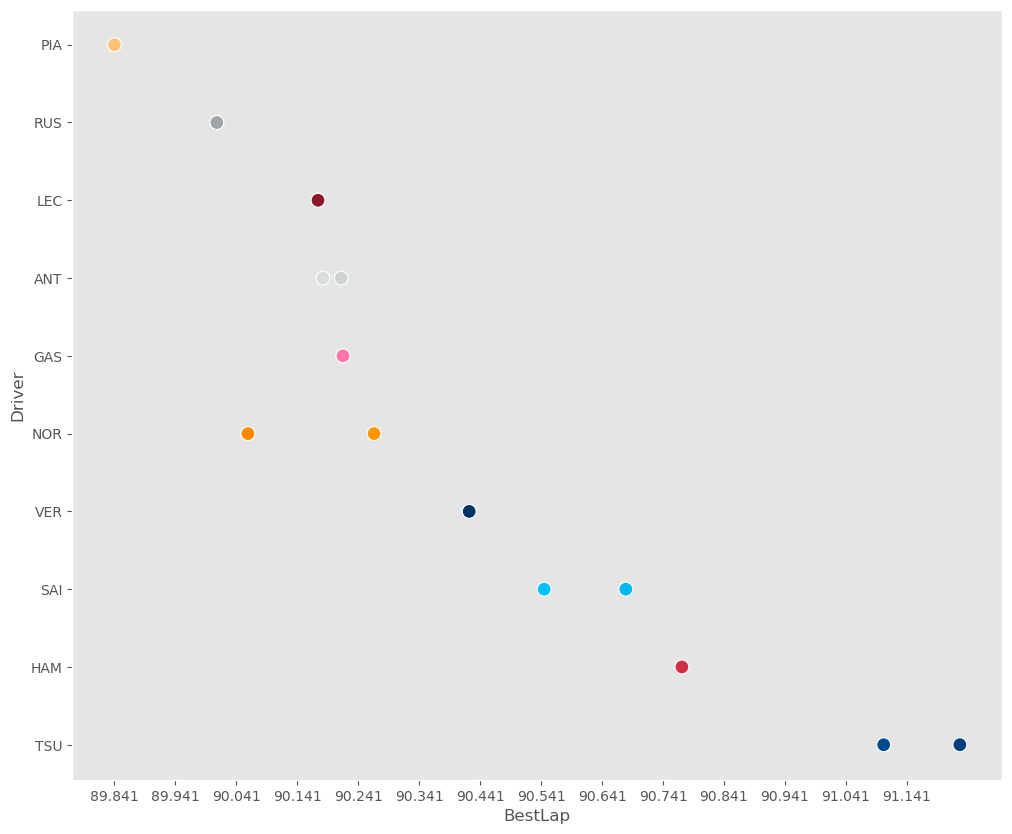

In [6]:
improv_df = ut.generate_improv_df(quali_df)
ut.ideal_lap_chart(improv_df)

/Users/dario/Documents/Python Stuff/F1/utilities.py:246: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=input_df.groupby('Driver')['SpeedST'].max().sort_values(ascending=False),palette=driver_colors)


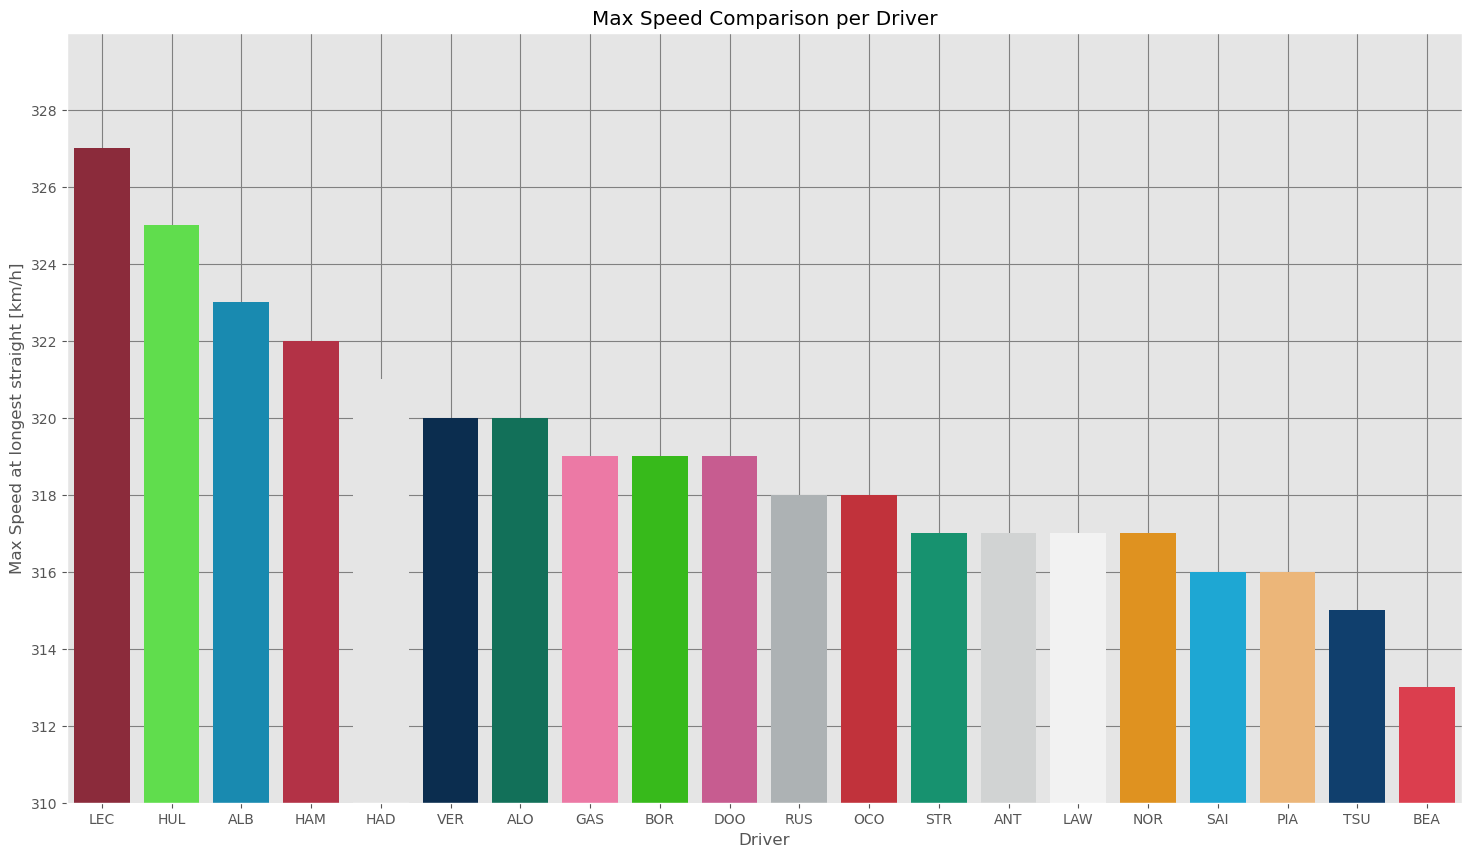

In [7]:
ut.top_speed_comparison_chart(quali_df)

/Users/dario/Documents/Python Stuff/F1/utilities.py:294: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(custom_y_ticks_labels)


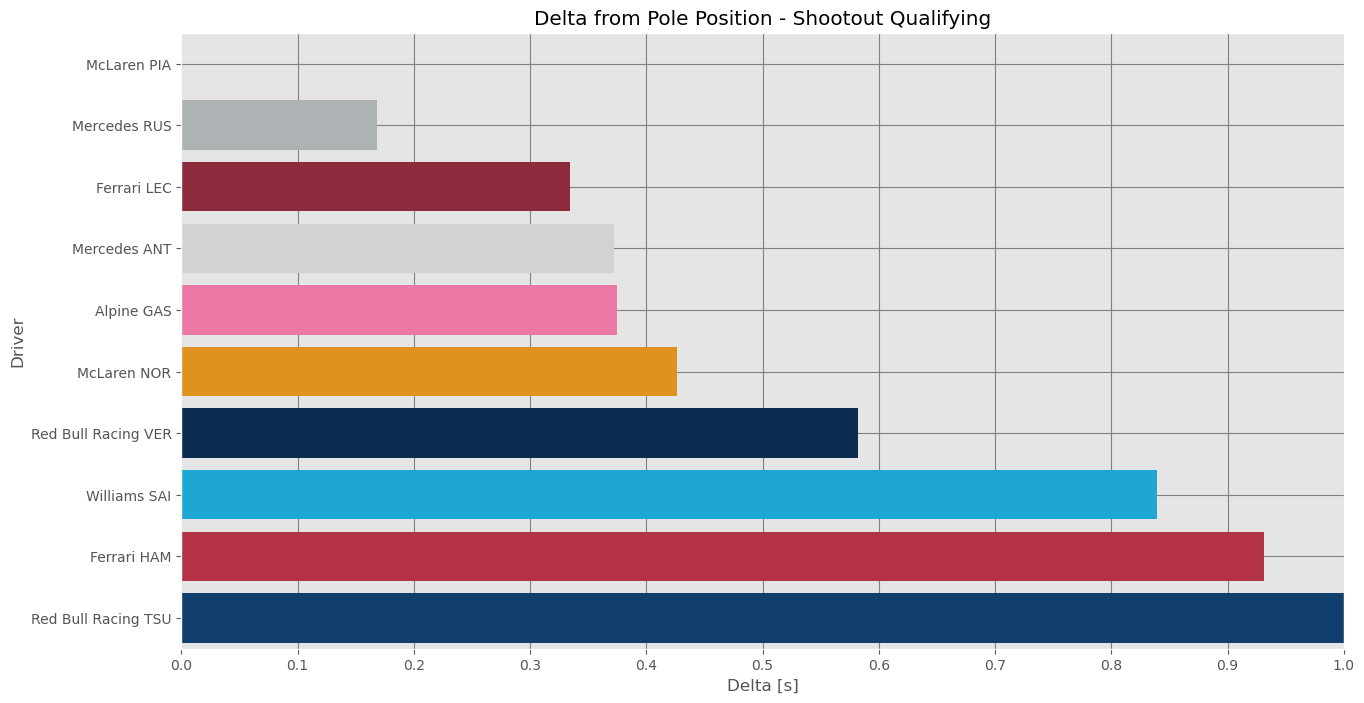

In [8]:
ut.delta_from_pole_chart(quali_df)

## Race

In [9]:
race = fastf1.get_session(2025,'Bahrain','R')
race.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 63: Lap timing integrity check failed for 3 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '

In [10]:
race_df = race.laps
race_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:13.827000,PIA,81,0 days 00:01:38.693000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.130000,...,False,McLaren,0 days 00:55:34.907000,2025-04-13 15:03:49.174,1,1.0,False,,False,False
1,0 days 00:58:51.319000,PIA,81,0 days 00:01:37.492000,2.0,1.0,NaT,NaT,0 days 00:00:31.139000,0 days 00:00:42.343000,...,False,McLaren,0 days 00:57:13.827000,2025-04-13 15:05:28.094,1,1.0,False,,False,True
2,0 days 01:00:29.402000,PIA,81,0 days 00:01:38.083000,3.0,1.0,NaT,NaT,0 days 00:00:31.306000,0 days 00:00:42.727000,...,False,McLaren,0 days 00:58:51.319000,2025-04-13 15:07:05.586,1,1.0,False,,False,True
3,0 days 01:02:07.535000,PIA,81,0 days 00:01:38.133000,4.0,1.0,NaT,NaT,0 days 00:00:31.326000,0 days 00:00:42.796000,...,False,McLaren,0 days 01:00:29.402000,2025-04-13 15:08:43.669,1,1.0,False,,False,True
4,0 days 01:03:45.578000,PIA,81,0 days 00:01:38.043000,5.0,1.0,NaT,NaT,0 days 00:00:31.305000,0 days 00:00:42.690000,...,False,McLaren,0 days 01:02:07.535000,2025-04-13 15:10:21.802,1,1.0,False,,False,True


In [11]:
ut.generate_times_in_seconds(race_df)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,S1InSeconds,S2InSeconds,S3InSeconds
0,0 days 00:57:13.827000,PIA,81,0 days 00:01:38.693000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.130000,...,1,1.0,False,,False,False,98.693,NaN,42.130,23.956
1,0 days 00:58:51.319000,PIA,81,0 days 00:01:37.492000,2.0,1.0,NaT,NaT,0 days 00:00:31.139000,0 days 00:00:42.343000,...,1,1.0,False,,False,True,97.492,31.139,42.343,24.010
2,0 days 01:00:29.402000,PIA,81,0 days 00:01:38.083000,3.0,1.0,NaT,NaT,0 days 00:00:31.306000,0 days 00:00:42.727000,...,1,1.0,False,,False,True,98.083,31.306,42.727,24.050
3,0 days 01:02:07.535000,PIA,81,0 days 00:01:38.133000,4.0,1.0,NaT,NaT,0 days 00:00:31.326000,0 days 00:00:42.796000,...,1,1.0,False,,False,True,98.133,31.326,42.796,24.011
4,0 days 01:03:45.578000,PIA,81,0 days 00:01:38.043000,5.0,1.0,NaT,NaT,0 days 00:00:31.305000,0 days 00:00:42.690000,...,1,1.0,False,,False,True,98.043,31.305,42.690,24.048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0 days 02:25:33.298000,HUL,27,0 days 00:01:38.260000,53.0,3.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.821000,...,1,15.0,False,,False,True,98.260,31.255,42.821,24.184
1124,0 days 02:27:11.796000,HUL,27,0 days 00:01:38.498000,54.0,3.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.992000,...,1,15.0,False,,False,True,98.498,31.388,42.992,24.118
1125,0 days 02:28:50.220000,HUL,27,0 days 00:01:38.424000,55.0,3.0,NaT,NaT,0 days 00:00:31.415000,0 days 00:00:42.892000,...,1,15.0,False,,False,True,98.424,31.415,42.892,24.117
1126,0 days 02:30:29.218000,HUL,27,0 days 00:01:38.998000,56.0,3.0,NaT,NaT,0 days 00:00:31.369000,0 days 00:00:43.236000,...,1,15.0,False,,False,True,98.998,31.369,43.236,24.393


In [12]:
ut.one_hot_pit_laps(race_df)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeInSeconds,S1InSeconds,S2InSeconds,S3InSeconds,PitLap
0,0 days 00:57:13.827000,PIA,81,0 days 00:01:38.693000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.130000,...,1.0,False,,False,False,98.693,NaN,42.130,23.956,0
1,0 days 00:58:51.319000,PIA,81,0 days 00:01:37.492000,2.0,1.0,NaT,NaT,0 days 00:00:31.139000,0 days 00:00:42.343000,...,1.0,False,,False,True,97.492,31.139,42.343,24.010,0
2,0 days 01:00:29.402000,PIA,81,0 days 00:01:38.083000,3.0,1.0,NaT,NaT,0 days 00:00:31.306000,0 days 00:00:42.727000,...,1.0,False,,False,True,98.083,31.306,42.727,24.050,0
3,0 days 01:02:07.535000,PIA,81,0 days 00:01:38.133000,4.0,1.0,NaT,NaT,0 days 00:00:31.326000,0 days 00:00:42.796000,...,1.0,False,,False,True,98.133,31.326,42.796,24.011,0
4,0 days 01:03:45.578000,PIA,81,0 days 00:01:38.043000,5.0,1.0,NaT,NaT,0 days 00:00:31.305000,0 days 00:00:42.690000,...,1.0,False,,False,True,98.043,31.305,42.690,24.048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0 days 02:25:33.298000,HUL,27,0 days 00:01:38.260000,53.0,3.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.821000,...,15.0,False,,False,True,98.260,31.255,42.821,24.184,0
1124,0 days 02:27:11.796000,HUL,27,0 days 00:01:38.498000,54.0,3.0,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.992000,...,15.0,False,,False,True,98.498,31.388,42.992,24.118,0
1125,0 days 02:28:50.220000,HUL,27,0 days 00:01:38.424000,55.0,3.0,NaT,NaT,0 days 00:00:31.415000,0 days 00:00:42.892000,...,15.0,False,,False,True,98.424,31.415,42.892,24.117,0
1126,0 days 02:30:29.218000,HUL,27,0 days 00:01:38.998000,56.0,3.0,NaT,NaT,0 days 00:00:31.369000,0 days 00:00:43.236000,...,15.0,False,,False,True,98.998,31.369,43.236,24.393,0


/Users/dario/Documents/Python Stuff/F1/utilities.py:215: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


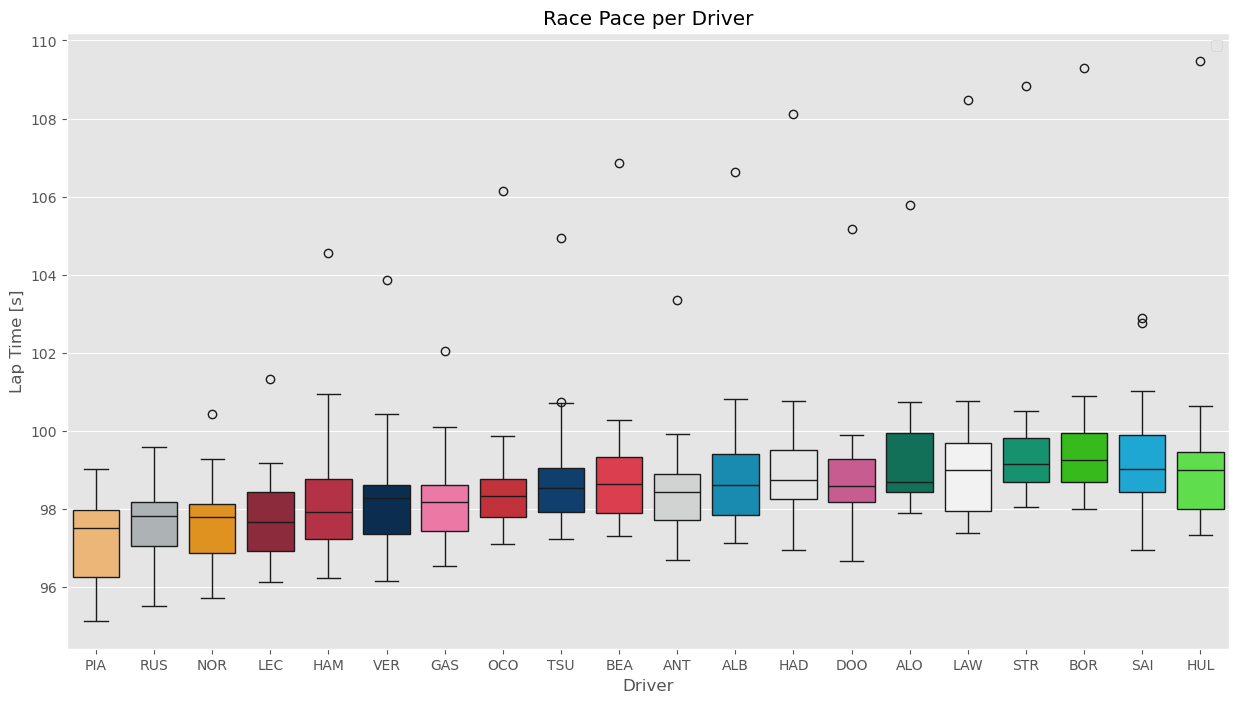

In [13]:
no_pits__no_sc_df = race_df[(race_df['PitLap']==0) & (race_df['TrackStatus']=='1')]
ut.race_pace_chart(no_pits__no_sc_df)

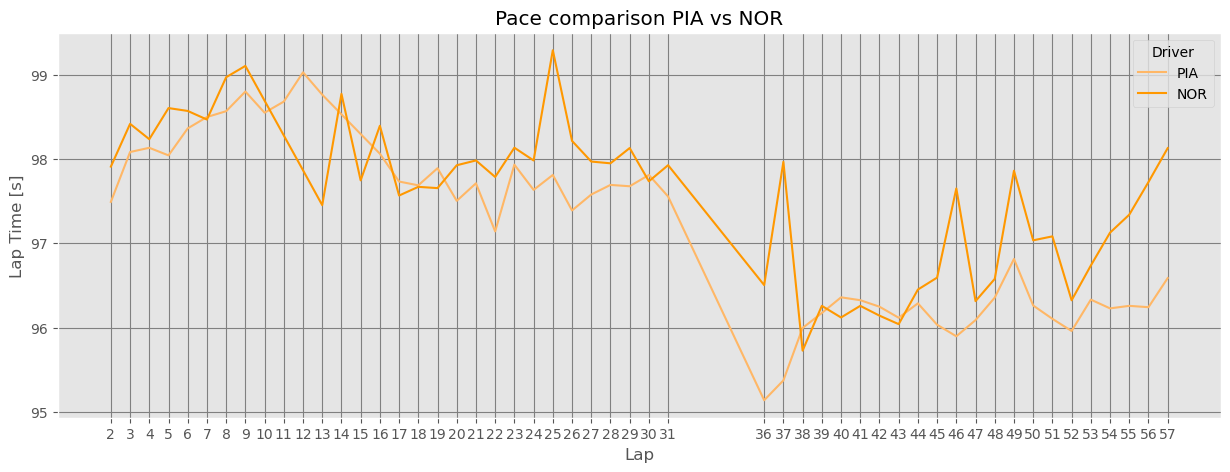

In [14]:
ut.race_pace_comparison_chart(race_df,'PIA','NOR')

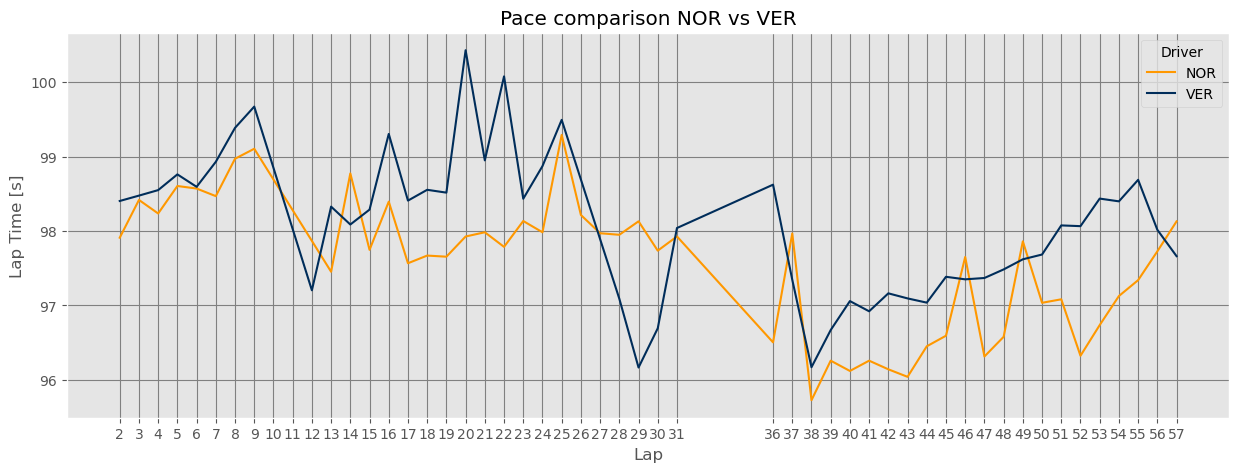

In [15]:
ut.race_pace_comparison_chart(race_df,'NOR','VER')

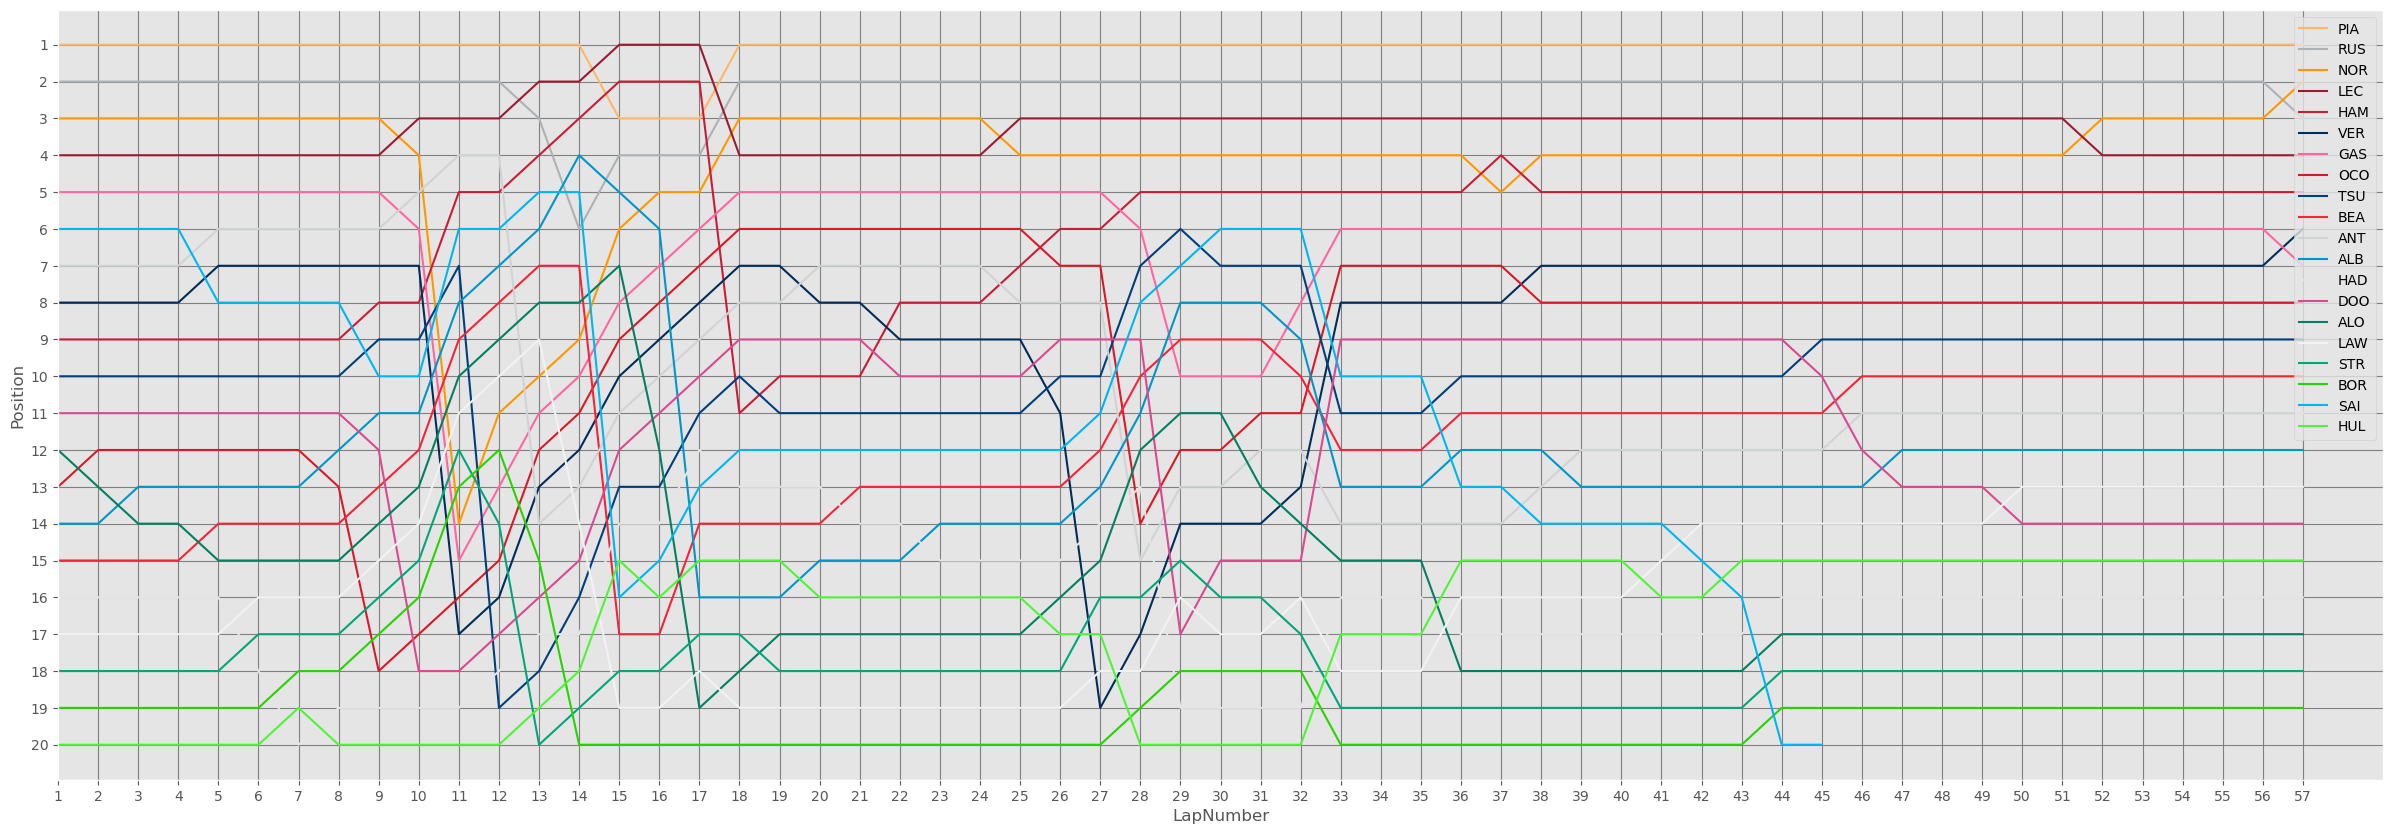

In [16]:
ut.position_switches_chart(race_df)

/Users/dario/Documents/Python Stuff/F1/utilities.py:246: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=input_df.groupby('Driver')['SpeedST'].max().sort_values(ascending=False),palette=driver_colors)


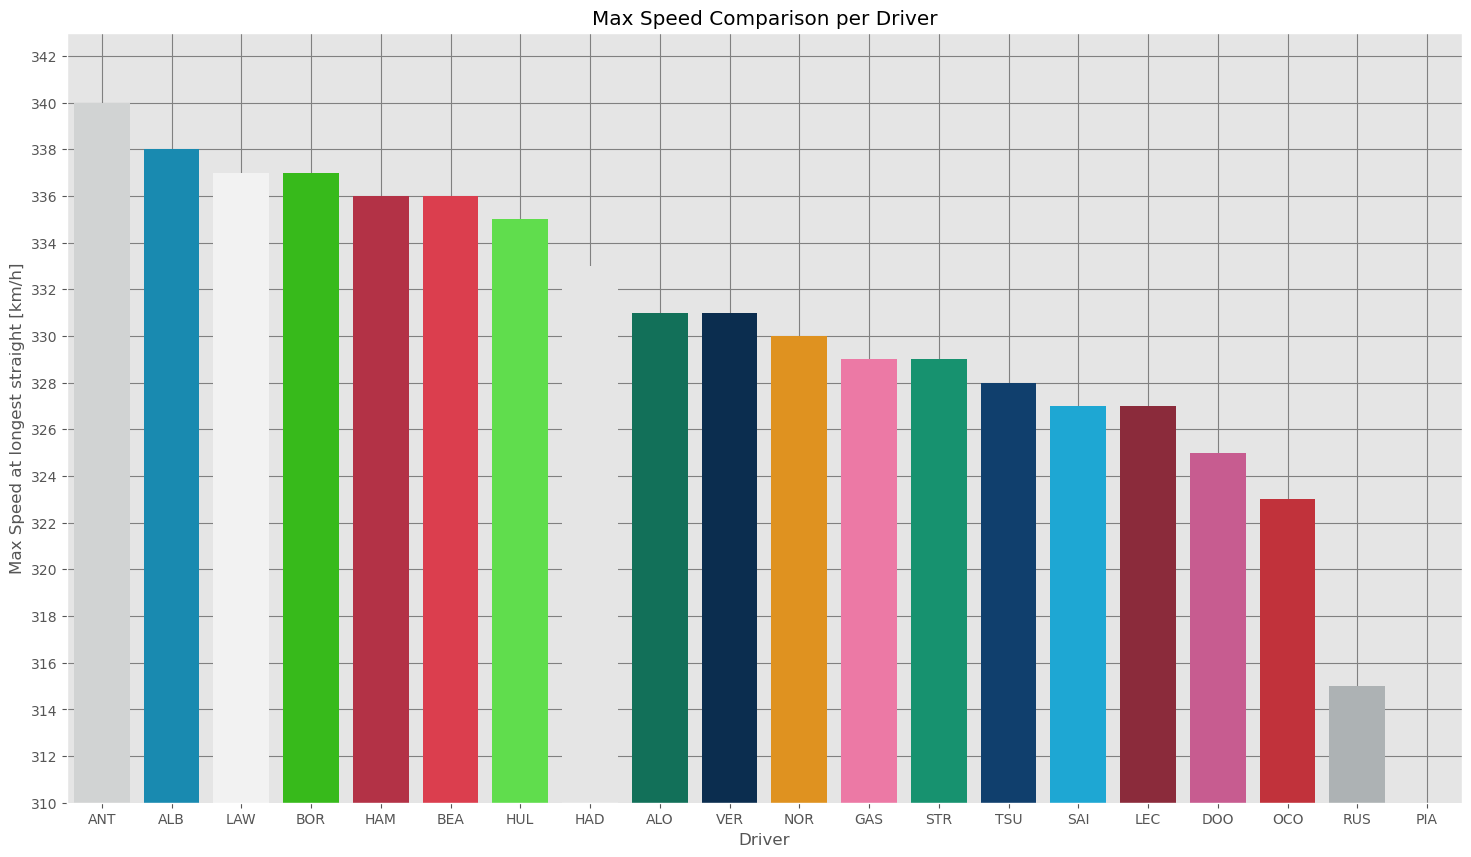

In [17]:
ut.top_speed_comparison_chart(race_df)

(                      Time Driver DriverNumber                LapTime  \
 172 0 days 00:58:54.514000    LEC           16 0 days 00:01:38.048000   
 173 0 days 01:00:32.977000    LEC           16 0 days 00:01:38.463000   
 174 0 days 01:02:11.250000    LEC           16 0 days 00:01:38.273000   
 175 0 days 01:03:49.677000    LEC           16 0 days 00:01:38.427000   
 176 0 days 01:05:28.461000    LEC           16 0 days 00:01:38.784000   
 177 0 days 01:07:07.141000    LEC           16 0 days 00:01:38.680000   
 178 0 days 01:08:46.274000    LEC           16 0 days 00:01:39.133000   
 179 0 days 01:10:25.438000    LEC           16 0 days 00:01:39.164000   
 180 0 days 01:12:04.319000    LEC           16 0 days 00:01:38.881000   
 181 0 days 01:13:43.504000    LEC           16 0 days 00:01:39.185000   
 182 0 days 01:15:22.477000    LEC           16 0 days 00:01:38.973000   
 183 0 days 01:17:01.198000    LEC           16 0 days 00:01:38.721000   
 184 0 days 01:18:40.068000    LEC    

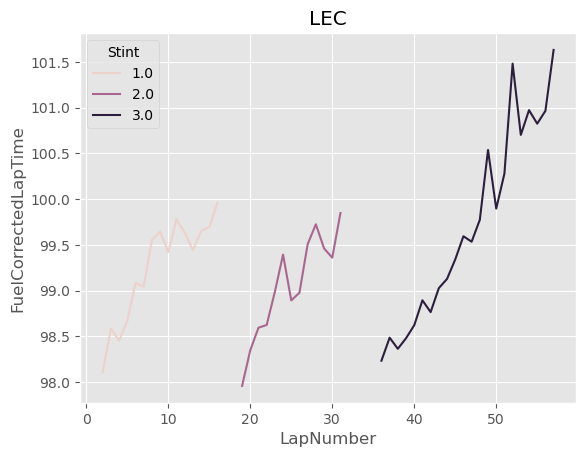

In [18]:
ut.compare_stint_lap_times(no_pits__no_sc_df,'LEC')

(                      Time Driver DriverNumber                LapTime  \
 172 0 days 00:58:54.514000    LEC           16 0 days 00:01:38.048000   
 173 0 days 01:00:32.977000    LEC           16 0 days 00:01:38.463000   
 174 0 days 01:02:11.250000    LEC           16 0 days 00:01:38.273000   
 175 0 days 01:03:49.677000    LEC           16 0 days 00:01:38.427000   
 176 0 days 01:05:28.461000    LEC           16 0 days 00:01:38.784000   
 177 0 days 01:07:07.141000    LEC           16 0 days 00:01:38.680000   
 178 0 days 01:08:46.274000    LEC           16 0 days 00:01:39.133000   
 179 0 days 01:10:25.438000    LEC           16 0 days 00:01:39.164000   
 180 0 days 01:12:04.319000    LEC           16 0 days 00:01:38.881000   
 181 0 days 01:13:43.504000    LEC           16 0 days 00:01:39.185000   
 182 0 days 01:15:22.477000    LEC           16 0 days 00:01:38.973000   
 183 0 days 01:17:01.198000    LEC           16 0 days 00:01:38.721000   
 184 0 days 01:18:40.068000    LEC    

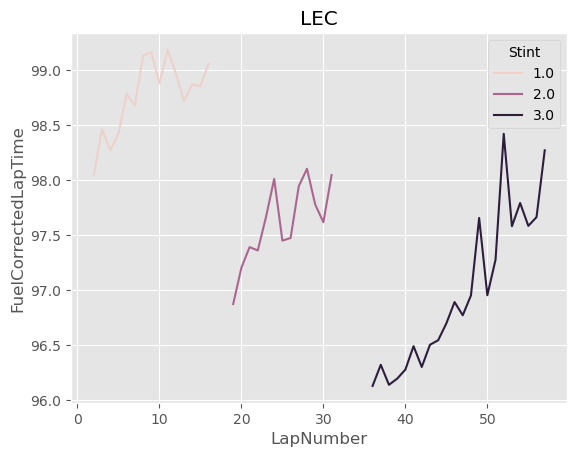

In [19]:
ut.compare_stint_lap_times(no_pits__no_sc_df,'LEC',0)

(                      Time Driver DriverNumber                LapTime  \
 229 0 days 00:58:58.268000    HAM           44 0 days 00:01:38.566000   
 230 0 days 01:00:36.687000    HAM           44 0 days 00:01:38.419000   
 231 0 days 01:02:15.341000    HAM           44 0 days 00:01:38.654000   
 232 0 days 01:03:54.806000    HAM           44 0 days 00:01:39.465000   
 233 0 days 01:05:33.910000    HAM           44 0 days 00:01:39.104000   
 234 0 days 01:07:13.189000    HAM           44 0 days 00:01:39.279000   
 235 0 days 01:08:52.932000    HAM           44 0 days 00:01:39.743000   
 236 0 days 01:10:33.877000    HAM           44 0 days 00:01:40.945000   
 237 0 days 01:12:13.174000    HAM           44 0 days 00:01:39.297000   
 238 0 days 01:13:52.320000    HAM           44 0 days 00:01:39.146000   
 239 0 days 01:15:31.205000    HAM           44 0 days 00:01:38.885000   
 240 0 days 01:17:10.108000    HAM           44 0 days 00:01:38.903000   
 241 0 days 01:18:49.235000    HAM    

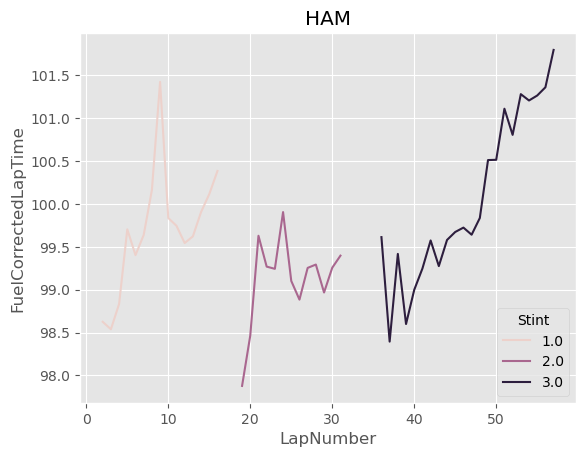

In [20]:
ut.compare_stint_lap_times(no_pits__no_sc_df,'HAM')

<Axes: xlabel='Driver', ylabel='LapNumber'>

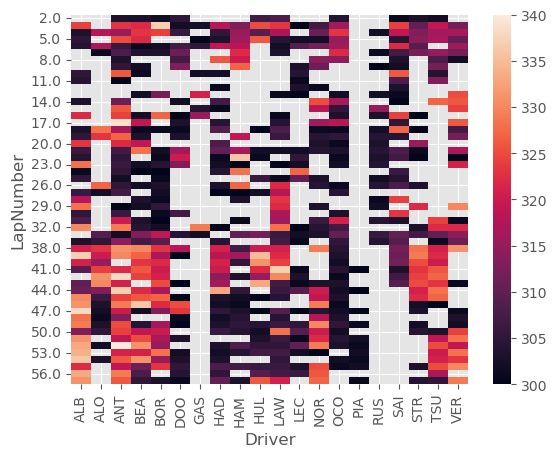

In [21]:
speed_df = race_df[race_df['SpeedST']>299][['LapNumber','Driver','SpeedST']].pivot(columns='Driver',values='SpeedST',index='LapNumber')
sns.heatmap(data=speed_df)

/var/folders/88/94pqx5n57z5crmg3w50s99y00000gn/T/ipykernel_3541/2462364129.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  speed_df_2 = race_df.groupby('Driver', group_keys=False).apply(lambda x: x.nlargest(10, 'SpeedST'))


<Axes: xlabel='Rank', ylabel='Driver'>

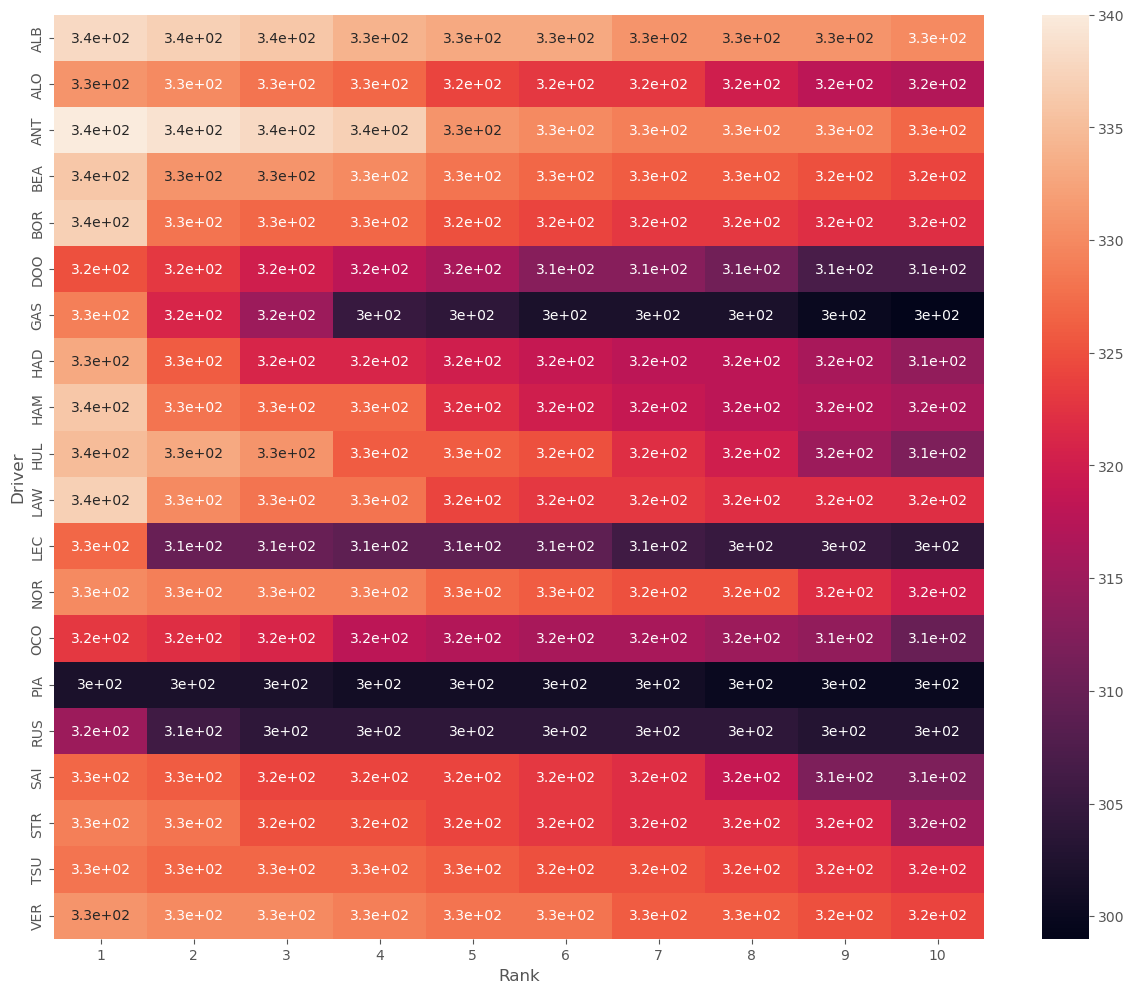

In [31]:
speed_df_2 = race_df.groupby('Driver', group_keys=False).apply(lambda x: x.nlargest(10, 'SpeedST'))
speed_df_2['Rank'] = speed_df_2.groupby('Driver')['SpeedST'].rank(method='first',ascending=False).astype('int')
speed_df_2 = speed_df_2.pivot(index='Driver',columns='Rank',values='SpeedST')
speed_df_2 = speed_df_2[sorted(speed_df_2.columns)]
plt.figure(figsize=(15,12))
sns.heatmap(speed_df_2,annot=True)

In [28]:
speed_df_2.describe()

Driver,ALB,ALO,ANT,BEA,BOR,DOO,GAS,HAD,HAM,HUL,LAW,LEC,NOR,OCO,PIA,RUS,SAI,STR,TSU,VER
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,333.400000,324.100000,332.900000,328.400000,325.800000,315.300000,307.900000,320.600000,323.000000,324.500000,325.900000,309.400000,326.20000,317.200000,301.000000,305.100000,321.300000,323.400000,325.40000,327.700000
std,2.796824,4.863698,4.976612,3.627059,4.491968,6.236986,10.202941,5.420127,6.342099,7.472171,4.886489,6.586181,3.29309,3.966527,0.816497,3.573047,5.355164,3.921451,1.95505,2.359378
min,330.000000,317.000000,327.000000,324.000000,322.000000,307.000000,299.000000,314.000000,316.000000,312.000000,322.000000,304.000000,320.00000,310.000000,300.000000,303.000000,312.000000,315.000000,322.00000,324.000000
25%,331.000000,320.750000,329.000000,326.000000,323.000000,311.500000,302.000000,318.000000,318.250000,320.500000,322.250000,305.250000,325.00000,315.250000,300.250000,304.000000,319.750000,322.000000,324.25000,326.000000
50%,333.000000,323.500000,330.500000,327.500000,324.500000,314.500000,303.000000,319.500000,321.000000,325.500000,323.500000,309.000000,326.50000,316.500000,301.000000,304.000000,323.500000,323.500000,325.50000,328.000000
75%,335.500000,327.750000,337.750000,330.750000,327.000000,319.500000,312.500000,321.000000,327.000000,329.750000,328.000000,309.750000,329.00000,320.250000,301.750000,304.000000,324.000000,325.000000,327.00000,329.750000
max,338.000000,331.000000,340.000000,336.000000,337.000000,325.000000,329.000000,333.000000,336.000000,335.000000,337.000000,327.000000,330.00000,323.000000,302.000000,315.000000,327.000000,329.000000,328.00000,331.000000
